In [12]:
import torch
import faces_model
from PIL import Image
import data
import torchvision.transforms as transforms
from torch.autograd import Variable
from open_face_model import OpenFace
import matplotlib.pyplot as plt
import numpy as np
from DTNet.datasets import celebA

import matplotlib.pyplot as plt

import torchvision

import torch.nn as nn

from DTNet.datasets import celebA
from data import *

In [13]:
class ZeroPadBottom(object):
    ''' Zero pads batch of image tensor Variables on bottom to given size. Input (B, C, H, W) - padded on H axis. '''
    def __init__(self, size, use_gpu=True):
        self.size = size
        self.use_gpu = use_gpu
        
    def __call__(self, sample):
        B, C, H, W = sample.size()
        diff = self.size - H
        padding = Variable(torch.zeros(B, C, diff, W), requires_grad=False)
        if self.use_gpu:
            padding = padding.cuda()
        zero_padded = torch.cat((sample, padding), dim=2)
        return zero_padded

In [14]:
f_model = OpenFace(True, 0)
f_model.load_state_dict(torch.load('./pretrained_model/openface.pth'))
f_model = f_model.eval()

In [15]:
model = torch.load('log/1543773462_318_63.tar')

In [16]:
train_set = celebA.CelebA(data_dir = './data/celebA/images', annotations_dir='./data/celebA/annotations', split='train', transform = transforms.Compose([ResizeTransform(96)]))

init done


In [17]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=True) #TODO: why does shuffle give out of bounds indices?

In [18]:
data_iter = iter(train_loader)
img_tens = data_iter.next()
img_tens = img_tens.cuda()
img_v = Variable(img_tens, requires_grad=False)
f, f_736 = f_model(img_v)
print(f.size(), f_736.size())

(torch.Size([1, 128]), torch.Size([1, 736]))


In [19]:
s_G = model['G_model'](torch.cat((f, f_736), dim=1))
up96 = nn.Upsample(size=(96,96), mode='bilinear')
s_G = up96(s_G)
s_G = s_G.cpu().data
unnorm_emoji = UnNormalizeRangeTanh()
res = unnorm_emoji(s_G[:16])

In [20]:
npimg = torchvision.utils.make_grid(res, nrow=4).numpy()
npimg = np.transpose(npimg, (1, 2, 0)) 
zero_array = np.zeros(npimg.shape)
one_array = np.ones(npimg.shape)
npimg = np.minimum(npimg,one_array)
npimg = np.maximum(npimg,zero_array)

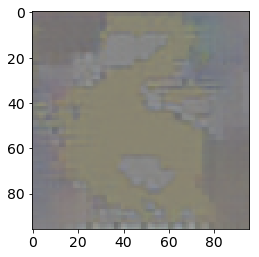

In [21]:
plt.imshow(npimg)

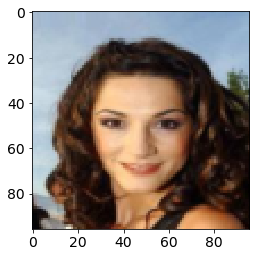

In [22]:
npimg2 = torchvision.utils.make_grid(img_tens.cpu(), nrow=4).numpy()
npimg2 = np.transpose(npimg2, (1, 2, 0)) 
zero_array2 = np.zeros(npimg2.shape)
one_array2 = np.ones(npimg2.shape)
npimg2 = np.minimum(npimg2,one_array2)
npimg2 = np.maximum(npimg2,zero_array2)
plt.imshow(npimg2)

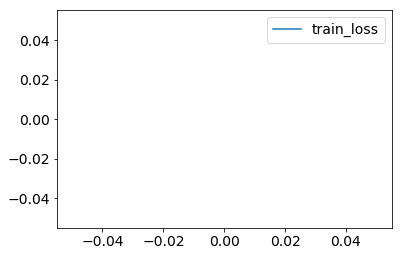

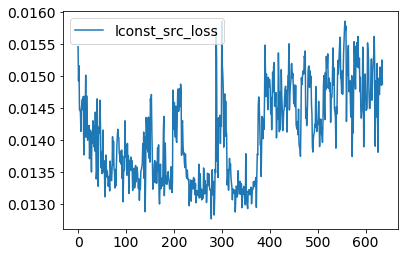

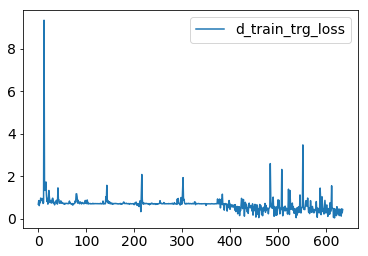

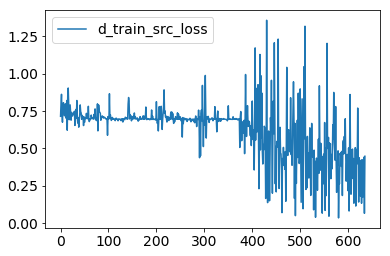

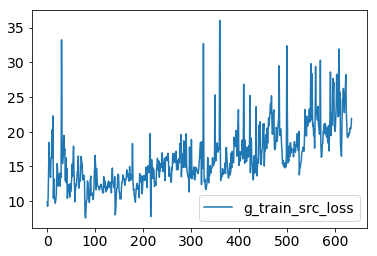

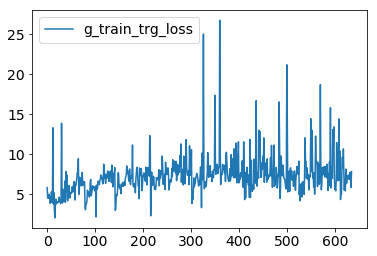

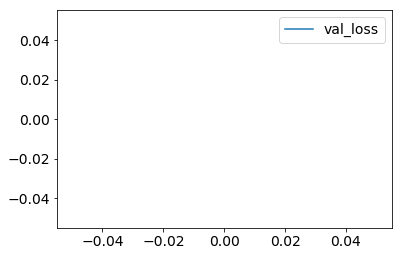

In [23]:
import matplotlib
plt.figure()
matplotlib.rcParams['font.size'] = 14
for key in model:
    if 'loss' in key and model[key] is not None:
        y = model[key][2:]
        x = np.arange(0, 11450, 50)
        plt.plot(y,label=key)
        plt.legend()
#         plt.ylabel('Loss')
#         plt.xlabel('Batches (size 128)')
        plt.show()